In [5]:
#import dependencies
import numpy as np
import pandas as pd
import requests
import os 

from io import StringIO

import matplotlib.pyplot as plt

In [6]:
# This is for 2017 DF
orig_url = "https://drive.google.com/file/d/1zFHNHw6mTh4kyx8pVd27rh2ttV8b7zfU/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
wine_df_2017 = pd.read_csv(csv_raw)
wine_df_2017.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La BÃ©gude, named af...",La BrÃ»lade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la BÃ©gude


In [7]:
# Drop columns that are not needed for the ML piece
wine_ml_2017 = wine_df_2017.drop(['designation', 'province', 'winery', 'variety'], axis=1)
wine_ml_2017.head()

,Unnamed: 0,country,description,points,price,region_1,region_2
0,0,US,This tremendous 100% varietal wine hails from ...,96,235.0,Napa Valley,Napa
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Toro,NaN
2,2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,Knights Valley,Sonoma
3,3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Willamette Valley,Willamette Valley
4,4,France,"This is the top wine from La BÃ©gude, named af...",95,66.0,Bandol,NaN


In [8]:
wine_ml_2017.isnull().sum()

Unnamed: 0         0
country            5
description        0
points             0
price          13695
region_1       25060
region_2       89977
dtype: int64

In [9]:
# Convert country values that are not US to Other Country
wine_ml_2017['country'] = wine_ml_2017['country'].replace({'Spain':'Other', 'Italy':'Other', 'France':'Other', 'Chile':'Other', 'Not US': 'Other', 'Portugal':'Other', 'Argentina':'Other', 'Australia':'Other', 'Germany':'Other', 'New Zealand':'Other', 'South Africa':'Other', 'Greece':'Other', 'Israel':'Other', 'Canada':'Other', 'Hungary':'Other', 'Romania':'Other', 'Croatia':'Other', 'Slovenia':'Other', 'Bulgaria':'Other', 'Mexico':'Other', 'Moldova':'Other', 'Uruguay':'Other', 'Turkey':'Other', 'Georgia':'Other', 'Lebanon':'Other', 'Cyprus':'Other','Brazil':'Other', 'England':'Other', 'Serbia':'Other', 'Morocco':'Other', 'Ukraine':'Other', 'Lithuania':'Other', 'Macedonia':'Other', 'Switzerland':'Other', 'Luxembourg':'Other', 'India':'Other', 'South Korea':'Other', 'China':'Other', 'Bosnia and Herzegovina':'Other', 'Japan':'Other', 'Austria':'Other'})
wine_ml_2017.head()

,Unnamed: 0,country,description,points,price,region_1,region_2
0,0,US,This tremendous 100% varietal wine hails from ...,96,235.0,Napa Valley,Napa
1,1,Other,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Toro,NaN
2,2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,Knights Valley,Sonoma
3,3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Willamette Valley,Willamette Valley
4,4,Other,"This is the top wine from La BÃ©gude, named af...",95,66.0,Bandol,NaN


In [10]:
# shows the counts by country to see spread
# US is roughly half of the dataset
wine_ml_2017.groupby(['country']).count()

,Unnamed: 0,description,points,price,region_1,region_2
country,,,,,,
Albania,2,2,2,2,0,0
Czech Republic,6,6,6,6,0,0
Egypt,3,3,3,0,0,0
Montenegro,2,2,2,2,0,0
Other,88509,88509,88509,75077,63609,0
Slovakia,3,3,3,3,0,0
Tunisia,2,2,2,0,0,0
US,62397,62397,62397,62139,62261,60953
US-France,1,1,1,1,0,0


In [11]:
# Convert the TARGET COLUMN values to good_wine and great_wine
wine_ml_2017.loc[wine_ml_2017.points >= 90, "ratings_desc"] = 1 #great_wine
wine_ml_2017.loc[wine_ml_2017.points < 90, "ratings_desc"] = 0 #good_value

# validate the ratings_desc column is working
wine_ml_2017.sort_values(['points'], ascending=True)

,Unnamed: 0,country,description,points,price,region_1,region_2,ratings_desc
92914,92914,Other,"Smells like canned fruit, and tastes like gree...",80,10.0,PenedÃ¨s,NaN,0.0
96766,96766,Other,There's something not right about the way this...,80,27.0,Cava,NaN,0.0
96767,96767,Other,This is mucky and sweet. Its best foot is not ...,80,8.0,CariÃ±ena,NaN,0.0
96768,96768,Other,"Eight grapes comprise this weird, peanutty, al...",80,25.0,Utiel-Requena,NaN,0.0
96769,96769,US,"Port-like, with raisiny, baked cherry and cara...",80,40.0,California,California Other,0.0
...,...,...,...,...,...,...,...,...
111087,111087,Other,Thick as molasses and dark as caramelized brow...,100,210.0,Vin Santo di Montepulciano,NaN,1.0
92916,92916,US,A perfect score has to be considered in the co...,100,215.0,Stags Leap District,Napa,1.0
138867,138867,Other,Thick as molasses and dark as caramelized brow...,100,210.0,Vin Santo di Montepulciano,NaN,1.0
143522,143522,US,Impossibly aromatic. Hard to imagine greater c...,100,245.0,Rutherford,Napa,1.0


/Users/patrickpo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/patrickpo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

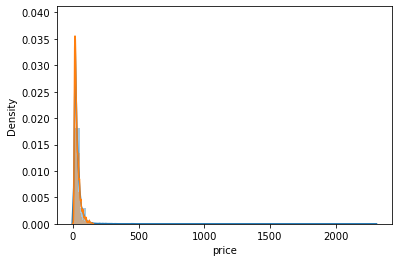

In [12]:
import seaborn as sns
sns.distplot(wine_ml_2017['price'])

#Removing the top 1% of the observation will help us to deal with the outliers
q = wine_ml_2017['price'].quantile(0.99)
wine_ml_2017 = wine_ml_2017[wine_ml_2017['price'] < q]

sns.distplot(wine_ml_2017['price'])

In [13]:
# Convert the COUNTRY COLUMN values to good_wine and great_wine
US_df = wine_ml_2017[wine_ml_2017.country == 'US']
US_df = US_df[['price', 'ratings_desc']]

US_df

,price,ratings_desc
2,90.0,1.0
3,65.0,1.0
8,65.0,1.0
9,60.0,1.0
11,48.0,1.0
...,...,...
150892,10.0,0.0
150896,10.0,0.0
150914,25.0,1.0
150915,30.0,1.0


In [14]:
Other_df = wine_ml_2017[wine_ml_2017.country == 'Other']
Other_df = Other_df[['price', 'ratings_desc']]
Other_df

,price,ratings_desc
1,110.0,1.0
4,66.0,1.0
5,73.0,1.0
6,65.0,1.0
7,110.0,1.0
...,...,...
150925,20.0,1.0
150926,27.0,1.0
150927,20.0,1.0
150928,52.0,1.0


### US Dataset

## 1. Split the Data into Training and Testing

In [15]:
# Create our features
X = US_df.drop('ratings_desc', axis =1 )

# Create our target
y = US_df['ratings_desc']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

## 2. Create a Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

 ## 3. Fit (train) or model using the training data

In [17]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

## 4. Make Predictions

In [18]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
26686,1.0,1.0
44600,0.0,0.0
123987,0.0,1.0
9914,0.0,0.0
107489,0.0,1.0
...,...,...
15413,0.0,0.0
84806,0.0,1.0
86538,0.0,0.0
12342,0.0,1.0


## 5. Validate the model using the test data

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.733790604374272

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions,y_test)
cm

array([[9433, 3193],
       [ 921, 1907]])

In [21]:
# Format for easier understanding
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted good_wine','Predicted great_wine']
cm_df = cm_df.rename(index={0: 'Actual good_wine',1:'Actual great_wine'})
cm_df

,Predicted good_wine,Predicted great_wine
Actual good_wine,9433,3193
Actual great_wine,921,1907


In [22]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,predictions))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.91      0.37      0.82      0.58      0.36     10354
        1.0       0.67      0.37      0.91      0.48      0.58      0.32      5100

avg / total       0.72      0.73      0.55      0.71      0.58      0.35     15454



### Other Country DF

In [23]:
# Create our features
X = Other_df.drop('ratings_desc', axis =1 )

# Create our target
y = Other_df['ratings_desc']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [25]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [26]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
148150,0.0,0.0
24062,0.0,0.0
120952,0.0,0.0
86255,0.0,1.0
13065,0.0,1.0
...,...,...
41019,0.0,0.0
83506,0.0,0.0
12637,0.0,1.0
131241,1.0,1.0


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8017988729952319

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions,y_test)
cm

array([[12558,  2907],
       [  751,  2240]])

In [29]:
# Format for easier understanding
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted good_wine','Predicted great_wine']
cm_df = cm_df.rename(index={0: 'Actual good_wine',1:'Actual great_wine'})
cm_df

,Predicted good_wine,Predicted great_wine
Actual good_wine,12558,2907
Actual great_wine,751,2240


In [30]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,predictions))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.81      0.94      0.44      0.87      0.64      0.43     13309
        1.0       0.75      0.44      0.94      0.55      0.64      0.39      5147

avg / total       0.79      0.80      0.58      0.78      0.64      0.42     18456

